# SMI data analysis with Python
**Authors**:<br>Marlon Marzer, marlon.marzer@stud.hslu.ch<br>Dario Schürch, dario.schuerch@hslu.ch<br>
**Lecturer**:<br>Simon Broda, simon.broda@hslu.ch

## Kurzer Beschrieb was wir im File machen

-Vergleich des SMI während der Finanzkrise 2008-2010 und COVID-19-Pandemie 2019-2020<br>
-Vergleich eines sample SMI Portfolio während der Finanzkrise 2008-2010 und COVID-19-Pandemie 2019-2020
- X
- X

## Install the packages and import the modules

In [1]:
#!pip install yfinance
#!pip install fix-yahoo-finance
#!pip install yfinance
#!pip install datetime
#!pip install pandas_datareader
import numpy as np
import matplotlib.pyplot as plt
import scipy as scipy
import yfinance as yf
import pandas as pd
import datetime as dt
from datetime import datetime
from pandas_datareader import data as pdr
from scipy.stats import norm




# Calculate the moving average, 50-day moving average and a 200-day moving average for the SMI 2004-2022

## Download the SMI data 2004-2022 which is needed

To get an overview let's have a look at the SMI from 2004 until today

In [2]:
start = datetime(2004,1,1)
end = datetime.today()
SMI= yf.download("^SSMI", start, end)
SMI.to_csv("SMI_ALL.csv")

[*********************100%***********************]  1 of 1 completed


In [3]:
portfolio = ["NOVN.SW", "UBSG.SW", "NESN.SW", "CSGN.SW", "ABBN.SW"]
start = datetime(2004,1,1)
end = datetime.today()
df = pdr.get_data_yahoo(portfolio, start, end)


Text(0.5, 1.0, 'Moving Averages SMI 2004-2022')

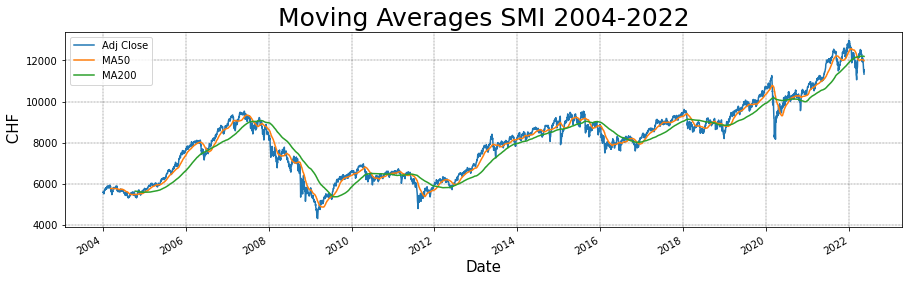

In [4]:
SMI["MA50"] = SMI["Adj Close"].rolling(50).mean()
SMI["MA200"] = SMI["Adj Close"].rolling(200).mean()
SMI["Adj Close"].plot(figsize = (15,4))
SMI["MA50"].plot()
SMI["MA200"].plot()
plt.grid(which="major", color="k", linestyle="-.", linewidth=0.3)
plt.legend()
plt.ylabel(" CHF", fontsize =15)
plt.xlabel("Date", fontsize =15)
plt.title("Moving Averages SMI 2004-2022", fontsize = 25)

## Findings<br>
Hier Erkenntnisse eintragen

# Calculate the moving average, 50-day moving average and a 100-day moving average for the SMI 2008-2010

Let us now take a closer look at the period 2008-2010

## Download the SMI data 2008-2010 which is needed

In [5]:
#get the data
start = datetime(2008,1,1)
end = datetime(2010,12,12)
SMI_08= yf.download("^SSMI", start, end)
SMI_08.to_csv("SMI_08.csv")

[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'Moving Averages SMI 2008-2010')

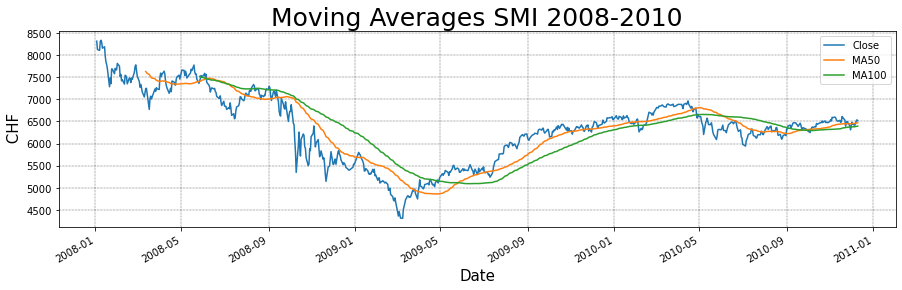

In [6]:
#plot
SMI_08 ["MA50"] = SMI_08["Close"].rolling(50).mean()
SMI_08 ["MA100"] = SMI_08["Close"].rolling(100).mean()
SMI_08["Close"].plot(figsize = (15,4))
SMI_08["MA50"].plot()
SMI_08["MA100"].plot()
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)
plt.legend()
plt.ylabel(" CHF", fontsize =15)
plt.xlabel("Date", fontsize =15)
plt.title("Moving Averages SMI 2008-2010", fontsize = 25)


# Calculate the moving average, 50-day moving average and a 100-day moving average for the SMI 2019-2021

Let us now take a closer look at the period 2008-2010

## Download the SMI data 2019-2021 which is needed

In [7]:
start = datetime(2019,1,1)
end = datetime(2021,12,31)
SMI_19 = yf.download("^SSMI", start, end)
SMI_19.to_csv("SMI_19.csv")

[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'Moving Averages SMI 2019-2021')

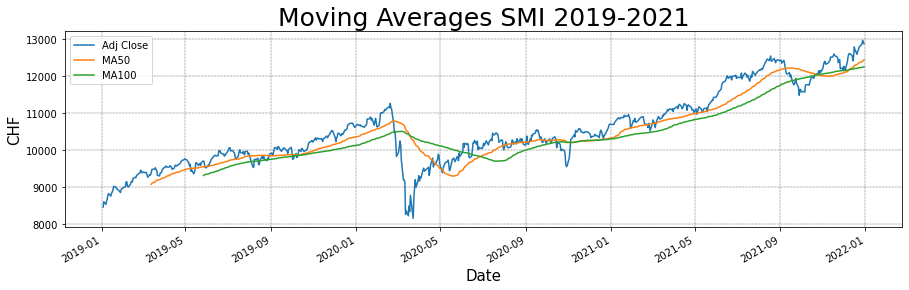

In [8]:
SMI_19["MA50"] = SMI_19["Adj Close"].rolling(50).mean()
SMI_19["MA100"] = SMI_19["Adj Close"].rolling(100).mean()
SMI_19["Adj Close"].plot(figsize = (15,4))
SMI_19["MA50"].plot()
SMI_19["MA100"].plot()
plt.grid(which="major", color="k", linestyle="-.", linewidth=0.3)
plt.legend()
plt.ylabel("CHF", fontsize =15)
plt.xlabel("Date", fontsize =15)
plt.title("Moving Averages SMI 2019-2021", fontsize = 25)

# Findings<br>
Hier Erkenntnisse eintragen, Vergleich 08-10 und 19-21

# Volatility clusterting SMI 2004-2022

In order to obtain an overview of volatility, we have created a volatility clustering. To calculate the volatility clustering , the first step is to calculate the log return. We have additionally calculated the percentage changes to show that the values are almost identical.

In [9]:
df_04 = pd.read_csv("SMI_ALL.csv",sep = ",", index_col=0)
df_04["Pct Change"]= df_04["Adj Close"].pct_change()
df_04["Log Return"]= np.log(df_04["Adj Close"]/df_04["Adj Close"].shift(1))
df_04 =df_04[1:] #Remove the first line (NaN)
df_04.head()

,Open,High,Low,Close,Adj Close,Volume,Pct Change,Log Return
Date,,,,,,,,
2004-01-06,5588.600098,5596.600098,5551.000000,5596.600098,5596.600098,43946200,0.002490,0.002487
2004-01-07,5602.899902,5620.899902,5562.600098,5583.399902,5583.399902,53545400,-0.002359,-0.002361
2004-01-08,5609.899902,5654.700195,5599.100098,5605.100098,5605.100098,97316800,0.003887,0.003879
2004-01-09,5620.700195,5630.000000,5542.299805,5574.700195,5574.700195,64582400,-0.005424,-0.005438
2004-01-12,5532.600098,5558.200195,5496.200195,5507.700195,5507.700195,73905600,-0.012019,-0.012091


Text(0.5, 0, 'Date')

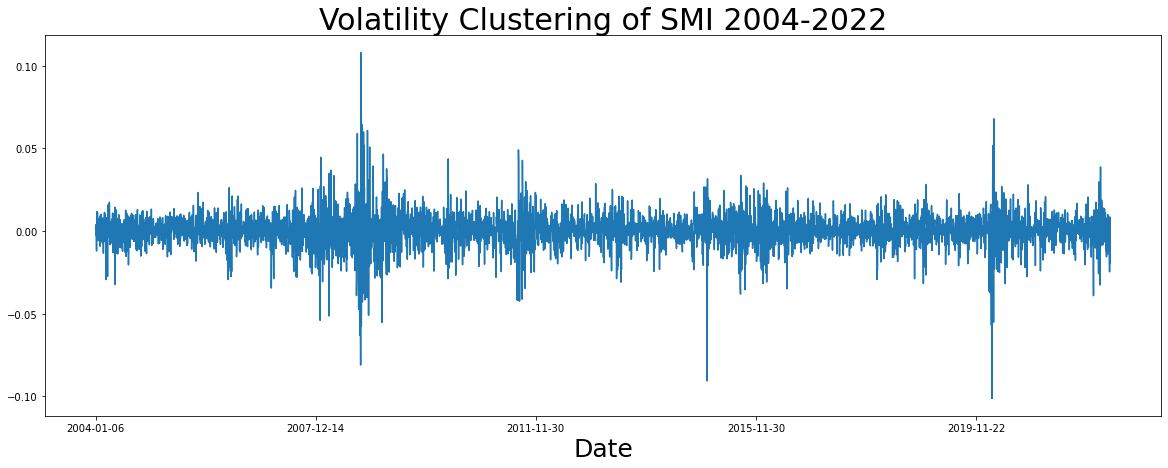

In [10]:
df_04["Log Return"].plot(figsize = (20,7))
plt.title("Volatility Clustering of SMI 2004-2022",  fontsize = 30)
plt.xlabel("Date",  fontsize = 25)

#Simon, how to add more Dates on the x-label?

# Findings<br>
Volatilität 08 und 20 beide gut ersichtlich, 08 aber breiter addditional: Euro Mindestkurs auch ersichtlich

# Comparison the Volatilityof the SMI 2008-2010 2019-2021 with various tools

## Calculate the log return and the percentage changes 

In [11]:
df_08 = pd.read_csv("SMI_08.csv",sep = ",", index_col=0)
df_08["Pct Change"]= df_08["Adj Close"].pct_change()
df_08["Log Return"]= np.log(df_08["Adj Close"]/df_08["Adj Close"].shift(1))
df_08 =df_08[1:] #Remove the first line (NaN)
df_08.head()

,Open,High,Low,Close,Adj Close,Volume,Pct Change,Log Return
Date,,,,,,,,
2008-01-04,8306.700195,8344.299805,8109.899902,8130.000000,8130.000000,82516600,-0.022696,-0.022957
2008-01-07,8090.500000,8213.099609,8070.299805,8110.600098,8110.600098,102996500,-0.002386,-0.002389
2008-01-08,8128.899902,8385.400391,8127.600098,8316.400391,8316.400391,132311200,0.025374,0.025058
2008-01-09,8263.500000,8345.500000,8216.299805,8339.799805,8339.799805,107972400,0.002814,0.002810
2008-01-10,8365.700195,8379.299805,8227.599609,8290.799805,8290.799805,94847600,-0.005875,-0.005893


In [12]:
df_19 = pd.read_csv("SMI_19.csv",sep = ",", index_col=0)
df_19["Pct Change"]= df_19["Adj Close"].pct_change()
df_19["Log Return"]= np.log(df_19["Adj Close"]/df_19["Adj Close"].shift(1))
df_19 =df_19[1:] #Remove the first line (NaN)
df_19.head()

,Open,High,Low,Close,Adj Close,Volume,Pct Change,Log Return
Date,,,,,,,,
2019-01-04,8493.839844,8627.360352,8441.339844,8608.559570,8608.559570,58578200,0.016838,0.016698
2019-01-07,8616.179688,8617.009766,8491.500000,8535.950195,8535.950195,46142100,-0.008435,-0.008470
2019-01-08,8560.330078,8670.669922,8560.160156,8629.480469,8629.480469,53742100,0.010957,0.010898
2019-01-09,8661.429688,8700.179688,8625.400391,8687.709961,8687.709961,52999900,0.006748,0.006725
2019-01-10,8640.240234,8812.889648,8617.929688,8801.480469,8801.480469,52626400,0.013096,0.013011


## Calculate the volatility as a ratio over 3 years


We assume that a stock exchange year contains 252 days

In [13]:
std_SMI_08= df_08["Log Return"].std()
std_SMI_19= df_19["Log Return"].std()
std_SMI_08_3Y = std_SMI_08 * np.sqrt(756) * 100
std_SMI_19_3Y = std_SMI_19 * np.sqrt(756) * 100
print(std_SMI_08_3Y)
print(std_SMI_19_3Y)

43.26581473111181
28.65452644105569


## Plot a histogram of the volatility of Log Returns SMI 2008-2010 and 2019-2021

Text(0.5, 1.0, 'Volatility SMI 2008-2010 and SMI 2019-2021')

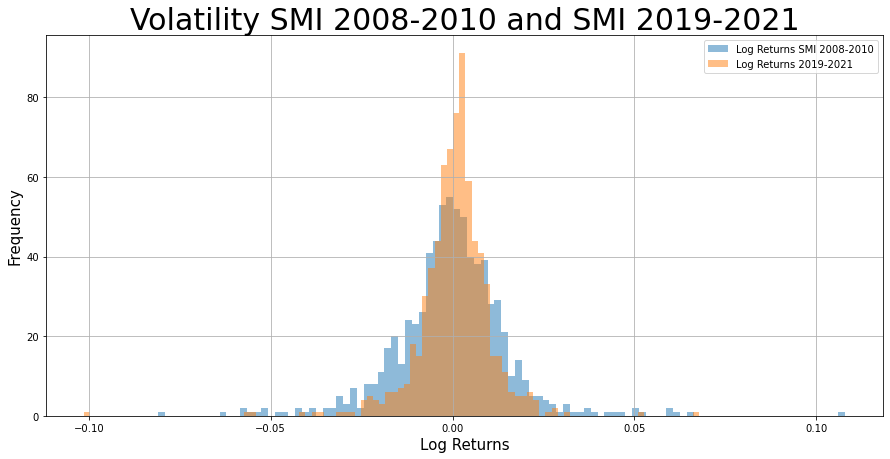

In [14]:
df_08["Log Return"].hist(bins = 100, label = "Log Returns SMI 2008-2010", alpha = 0.5, figsize = (15,7))
df_19["Log Return"].hist(bins = 100, label = "Log Returns 2019-2021", alpha = 0.5)
plt.legend()
plt.ylabel("Frequency", fontsize =15)
plt.xlabel("Log Returns", fontsize =15)
plt.title("Volatility SMI 2008-2010 and SMI 2019-2021", fontsize = 30)

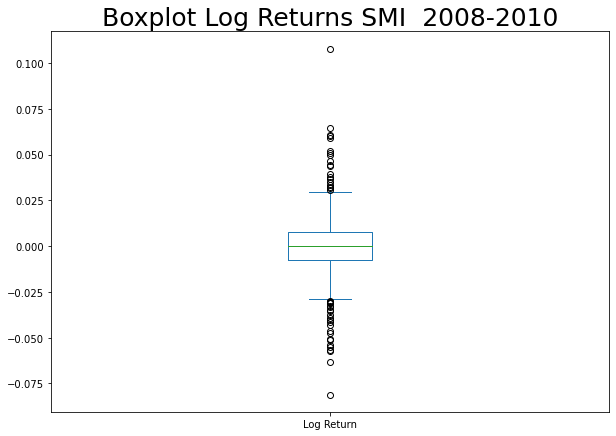

In [15]:
box_08 = df_08["Log Return"]
plt.figure(figsize = (10,7))
plt.title("Boxplot Log Returns SMI  2008-2010", fontsize = (25))
ax = box_08.plot.box()

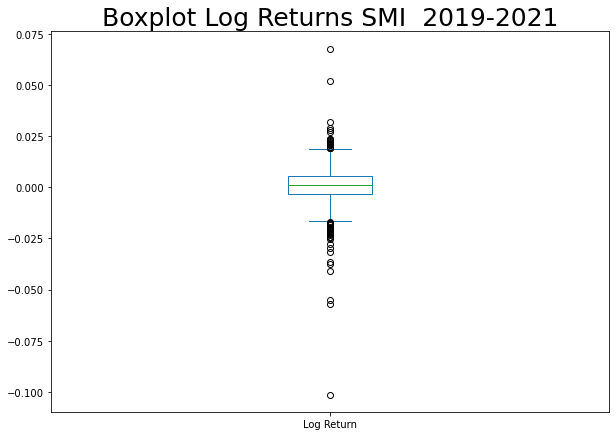

In [16]:
box_19 = df_19["Log Return"]
plt.figure(figsize = (10,7))
plt.title("Boxplot Log Returns SMI  2019-2021", fontsize = (25))
ax = box_19.plot.box()

# Findings<br> 
Wie man in den Kennzahlen schon sieht; SMI 08 = volatiler, dies zeichnet sich auch im Histogramm und Boxplot aus

# Comparison of the periods 2008-2010 and 2019-2021 using an SMI portfolio

The sample portfolio contains the following stocks each with a weighting of 20%:

- Novartis
- UBS
- Nestlé
- Credit Suisse
- ABB



# Comparison Adjusted closing prices of the SMI sample portfolio 2004-2022
<br>
To get an overview let's have a look at the adjusted closing prices in our sample portfolio

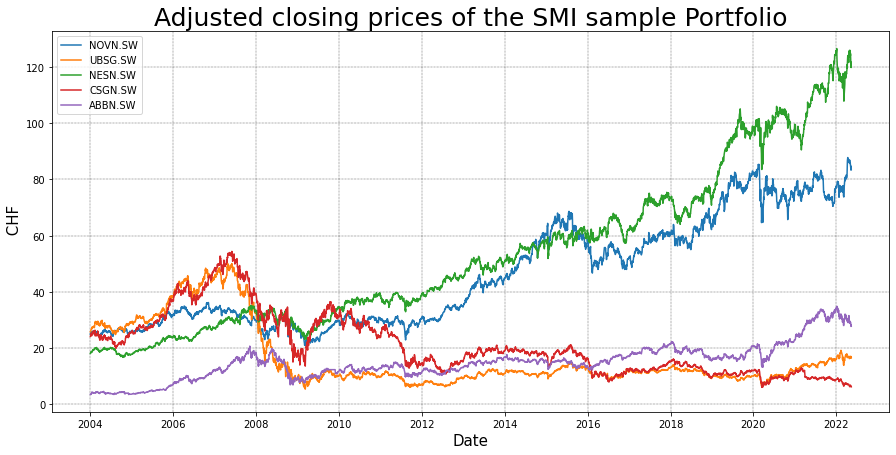

In [17]:
portfolio = ["NOVN.SW", "UBSG.SW", "NESN.SW", "CSGN.SW", "ABBN.SW"]
start = datetime(2004,1,1)
end = datetime.today()
df = pdr.get_data_yahoo(portfolio, start, end)
plt.figure(figsize = (15,7))
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)
plt.ylabel(" CHF", fontsize =15)
plt.xlabel("Date", fontsize =15)
labels = ["NOVN.SW", "UBSG.SW", "NESN.SW", "CSGN.SW", "ABBN.SW"]
plt.plot(df ["Adj Close"], label = labels)
plt.title("Adjusted closing prices of the SMI sample Portfolio", fontsize = 25)
plt.legend()

                                                                        
#Simon, kann man das indexieren? bzw gibt es einfache Methoden, habe nur komplizierte gefunden.



# Calculate the maximum portfolio loss of the SMI model portfolio 2008-2010 



- We assume that the returns of the stocks in our portfolio are normally distributed when calculating Value at risk (VaR)
- We use pct change to calculate VaR because they are quite similar to log return as you have seen in the table above



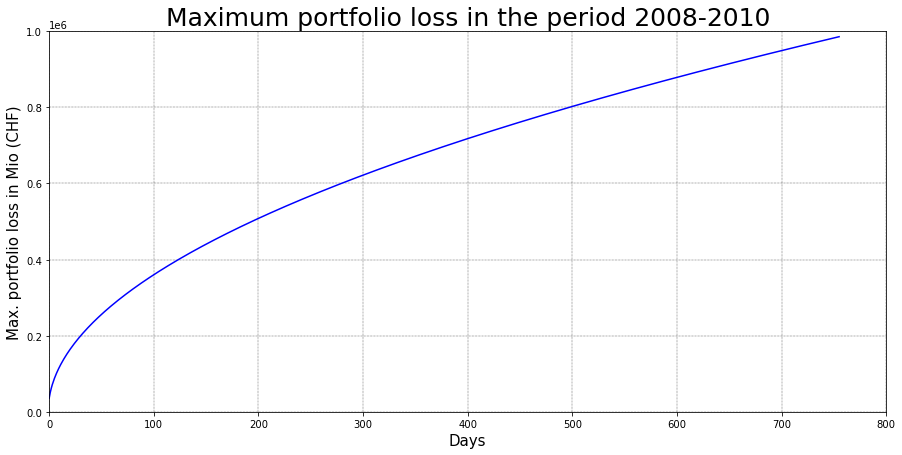

In [21]:
investment_08 = 1000000
start_08 = datetime(2008,1,1)
end_08 = datetime(2010,12,31)
df_08 = pdr.get_data_yahoo(portfolio_08, start_08, end_08) ["Adj Close"]
returns_08 = df_08.pct_change()

# Generate Var-Cov matrix 
cov_matrix_08 = returns_08.cov()
#print(cov_matrix)

#calculate mean returns of the stocks
mean_returns_08 = returns_08.mean()

#calculate mean returns for the portfolio and normalize against investments weights
mean_portfolio_08 = mean_returns_08.dot(weights_08)

#Standard deviation of the portfolio
std_portfolio_08 = np.sqrt(weights_08.T.dot(cov_matrix_08).dot(weights_08))

#Mean of investment
mean_investment_08 = (1+mean_portfolio_08) * investment_08

#Standard deviation of investment
std_investment_08 = investment_08 * std_portfolio_08

#confidence interval (95%)
alpha_08 = 0.05
var_cutoff_08 = norm.ppf(alpha_08, mean_investment_08, std_investment_08) #normal cumulative distribution
Var_08 = investment_08 - var_cutoff_08
#print(Var_08)


#Calculate VaR over 3 Years
import matplotlib.pyplot as plt
Var_array_08= []
days_08 = int(756)
for x in range(1, days_08+1):
    Var_array_08.append(np.round(Var_08 * np.sqrt(x), 2))
    #print(str(x) + " day VaR @ 95% confidence: " + str(np.round(Var_08 * np.sqrt(x), 2))) # acitvate code to see VaR over 3 years

plt.figure(figsize=(15,7))
plt.xlabel("Days", fontsize = 15)
plt.ylabel("Max. portfolio loss in Mio (CHF)", fontsize = 15)
plt.xlim(0,800)
plt.ylim(0,1_000_000)
plt.title("Maximum portfolio loss in the period 2008-2010", fontsize = 25)
plt.plot(Var_array_08, "b")
plt.grid(which="major", color="k", linestyle="-.", linewidth=0.3)


# Findings<br>
Logischerweise nimmt das Risiko mit steigender Anlagedauer zu

## Calculating the Value at Risk (VaR)

In [19]:
returns_08 = returns_08.fillna(0.0)
portfolio_returns_08 = returns_08.iloc[-days_08:].dot(weights_08)

VaR_08 = np.percentile(portfolio_returns_08, 100 * (alpha_08)) * investment_08
print(VaR_08)  # max loss with a conf level of 95% is 32.3k


-32374.38164067189


## Plotting the Value at Risk (VaR)

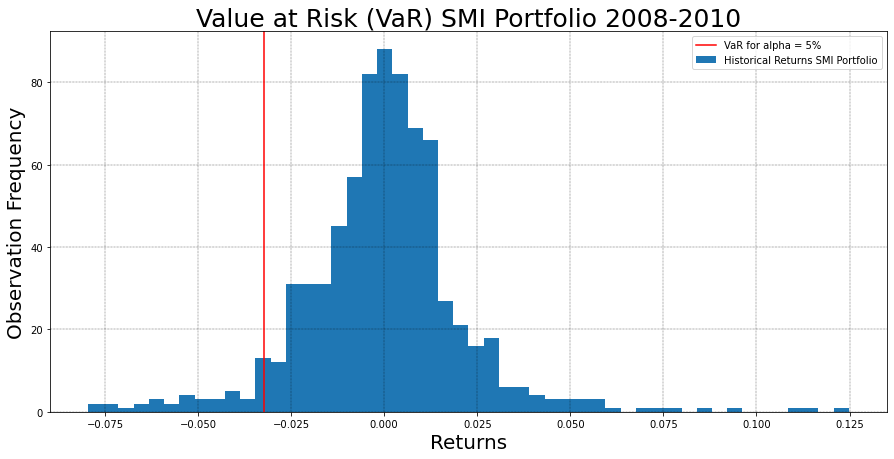

In [20]:
portfolio_returns_08 = returns_08.fillna(0.0).iloc[-days_08:].dot(weights_08)

portfolio_VaR_08 = VaR_08
portfolio_VaR_return_08 = portfolio_VaR_08 / investment_08

plt.figure(figsize=(15,7))
plt.hist(portfolio_returns_08, bins= 50)
plt.axvline(portfolio_VaR_return_08, color="r", linestyle="solid")
plt.legend(["VaR for alpha = 5%", "Historical Returns SMI Portfolio" ])
plt.title("Value at Risk (VaR) SMI Portfolio 2008-2010", fontsize = 25)
plt.xlabel("Returns", fontsize = 20)
plt.ylabel("Observation Frequency", fontsize = 20)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)


## Findings<br>
VAR = -32374.417335891012


#  Checking distributions of the returns against normal distribution

As mentioned in the calculation section, when calculating VaR we assume that the returns of the stocks in our portfolio are normally distributed. Of course, we cannot predict this for the future, but we can at least check how the historical returns were distributed to assess whether the VaR is appropriate for our sample portfolio.

##  5 titels in the sample portfolio vs normal distribution during the period 2008-2010


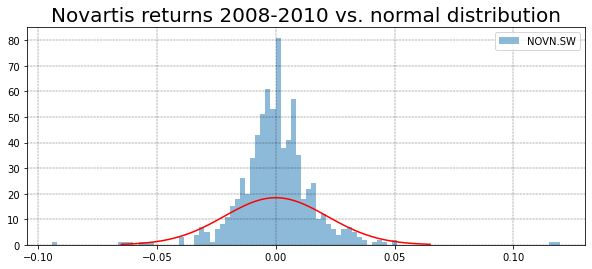

In [46]:
returns_08["NOVN.SW"].hist(bins = 100, label = "NOVN.SW", alpha = 0.5, figsize = (10,4))
x = np.linspace(mean_portfolio_08 - 3* std_portfolio_08, mean_portfolio_08 +3 *std_portfolio_08,100)
plt.plot(x, scipy.stats.norm.pdf(x, mean_portfolio_08, std_portfolio_08), "r")
plt.title("Novartis returns 2008-2010 vs. normal distribution", fontsize = (20))
plt.grid(which="major", color="k", linestyle="-.", linewidth=0.3)
plt.legend()



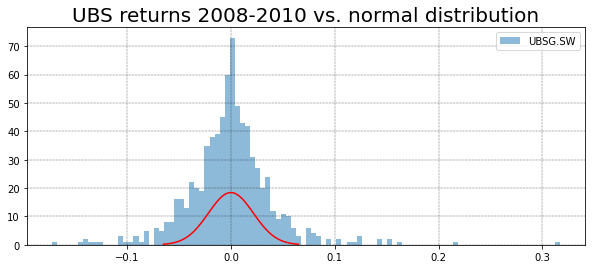

In [47]:
returns_08["UBSG.SW"].hist(bins = 100, label = "UBSG.SW", alpha = 0.5, figsize = (10,4))
x = np.linspace(mean_portfolio_08 - 3* std_portfolio_08, mean_portfolio_08 +3 *std_portfolio_08,100)
plt.plot(x, scipy.stats.norm.pdf(x, mean_portfolio_08, std_portfolio_08), "r")
plt.title("UBS returns 2008-2010 vs. normal distribution", fontsize = (20))
plt.grid(which="major", color="k", linestyle="-.", linewidth=0.3)
plt.legend()


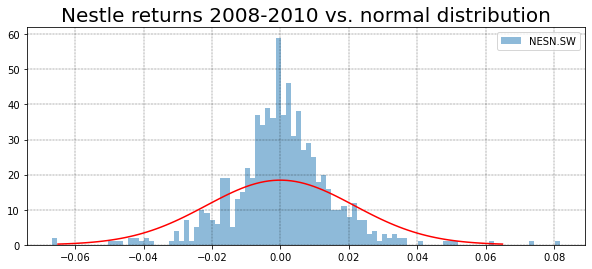

In [48]:
returns_08["NESN.SW"].hist(bins = 100, label = "NESN.SW", alpha = 0.5, figsize = (10,4))
x = np.linspace(mean_portfolio_08 - 3* std_portfolio_08, mean_portfolio_08 +3 *std_portfolio_08,100)
plt.plot(x, scipy.stats.norm.pdf(x, mean_portfolio_08, std_portfolio_08), "r")
plt.title("Nestle returns 2008-2010 vs. normal distribution", fontsize = (20))
plt.grid(which="major", color="k", linestyle="-.", linewidth=0.3)
plt.legend()

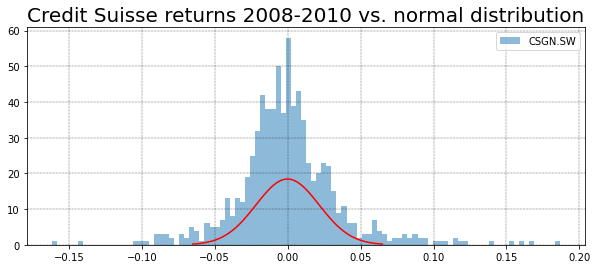

In [49]:
returns_08["CSGN.SW"].hist(bins = 100, label = "CSGN.SW", alpha = 0.5, figsize = (10,4))
x = np.linspace(mean_portfolio_08 - 3* std_portfolio_08, mean_portfolio_08 +3 *std_portfolio_08,100)
plt.plot(x, scipy.stats.norm.pdf(x, mean_portfolio_08, std_portfolio_08), "r")
plt.title("Credit Suisse returns 2008-2010 vs. normal distribution", fontsize = (20))
plt.grid(which="major", color="k", linestyle="-.", linewidth=0.3)
plt.legend()

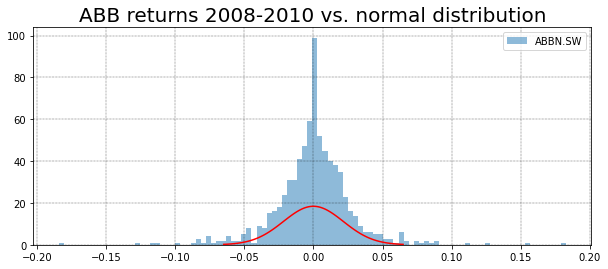

In [50]:
returns_08["ABBN.SW"].hist(bins = 100, label = "ABBN.SW", alpha = 0.5, figsize = (10,4))
x = np.linspace(mean_portfolio_08 - 3* std_portfolio_08, mean_portfolio_08 +3 *std_portfolio_08,100)
plt.plot(x, scipy.stats.norm.pdf(x, mean_portfolio_08, std_portfolio_08), "r")
plt.title("ABB returns 2008-2010 vs. normal distribution", fontsize = (20))
plt.grid(which="major", color="k", linestyle="-.", linewidth=0.3)
plt.legend()

The plots show that the retruns are approximately normally distributed

## Findings<br>
Daten zeigen dass die Returns annähernd normalverteilt sind, somit dürfen wir die Berechnungen für den VaR vollziehen

# Calculate the maximum portfolio loss of the SMI model portfolio 2019-2021 

- We assume that the returns of the stocks in our portfolio are normally distributed when calculating Value at risk (VaR)
- We use pct change to calculate VaR because they are quite similar to log return as you have seen in the table above

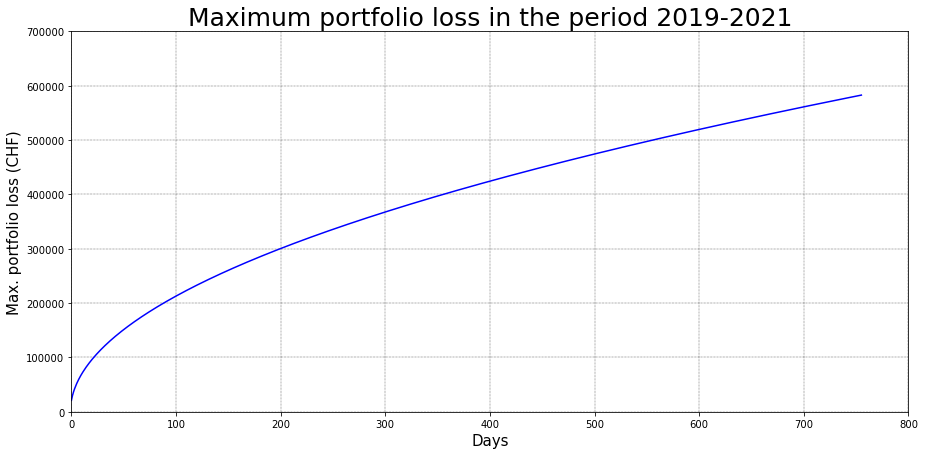

In [52]:
portfolio_19 = ["NOVN.SW", "UBSG.SW", "NESN.SW", "CSGN.SW", "ABBN.SW"]
weights_19 = np.array([.2, .2, .2, .2, .2])
investment_19 = 1000000
start_19 = datetime(2019,1,1)
end_19 = datetime(2021,12,31)
df_19 = pdr.get_data_yahoo(portfolio_19, start_19, end_19) ["Adj Close"]
returns_19 = df_19.pct_change()
#print(returns)

# Generate Var-Cov matrix 
cov_matrix_19 = returns_19.cov()
#print(cov_matrix)

#calculate mean returns of the stocks
mean_returns_19 = returns_19.mean()

#calculate mean returns for the portfolio and normalize against investments weights
mean_portfolio_19 = mean_returns_19.dot(weights_19)

#Standard deviation of the portfolio
std_portfolio_19 = np.sqrt(weights_19.T.dot(cov_matrix_19).dot(weights_19))

#Mean of investment
mean_investment_19 = (1+mean_portfolio_19) * investment_19

#Standard deviation of investment
std_investment_19 = investment_19 * std_portfolio_19

#Confidenceinterval (95%)
alpha_19 = 0.05
var_cutoff_19 = norm.ppf(alpha_19, mean_investment_19, std_investment_19) #normal cumulatice distribution
Var_19 = investment_19 - var_cutoff_19
#print(Var_19)

#Calculate VaR over 3 Years
Var_array_19= []
days_19 = int(756)
for x in range(1, days_19+1):
    Var_array_19.append(np.round(Var_19 * np.sqrt(x), 2))
    #print(str(x) + " day VaR @ 95% confidence: " + str(np.round(Var_19 * np.sqrt(x), 2))) # acitvate code to see VaR over 3 years


plt.figure(figsize=(15,7))
plt.xlabel("Days", fontsize = 15)
plt.ylabel("Max. portfolio loss (CHF)", fontsize = 15)
plt.xlim(0,800)
plt.ylim(0,700_000)
plt.title("Maximum portfolio loss in the period 2019-2021", fontsize = 25)
plt.plot(Var_array_19, "b")
plt.grid(which="major", color="k", linestyle="-.", linewidth=0.3)


## Calculating the Value at Risk (VaR)

In [53]:
returns_19 = returns_19.fillna(0.0)
portfolio_returns_19 = returns_19.iloc[-days_19:].dot(weights_19)
VaR_19 = np.percentile(portfolio_returns_19, 100 * (alpha_19)) * investment_19
print(VaR_19)  


-18435.83695709563


## Plotting the Value at Risk (VaR)

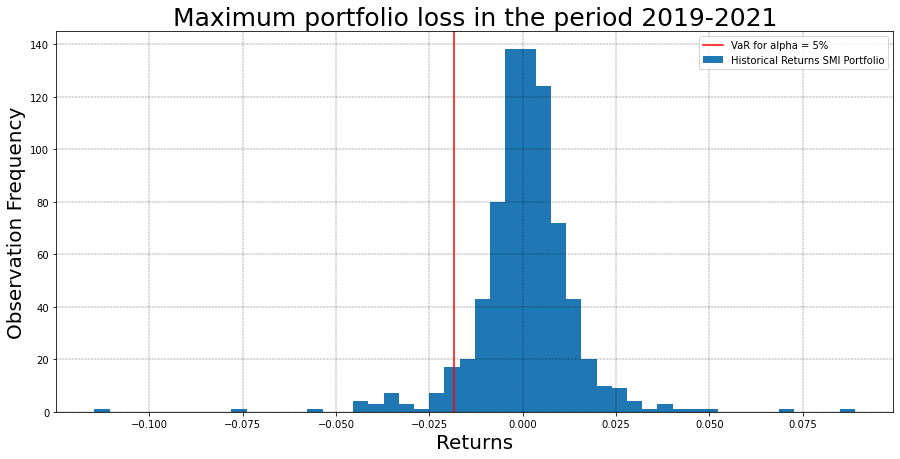

In [54]:
portfolio_returns_19_ = returns_19.fillna(0.0).iloc[-days_19:].dot(weights_19)

portfolio_VaR_19 = VaR_19
portfolio_VaR_return_19 = portfolio_VaR_19 / investment_19

plt.figure(figsize=(15,7))
plt.hist(portfolio_returns_19, bins= 50)
plt.axvline(portfolio_VaR_return_19, color="r", linestyle="solid")
plt.legend(["VaR for alpha = 5%", "Historical Returns SMI Portfolio" ])
plt.title("Maximum portfolio loss in the period 2019-2021", fontsize = 25)
plt.xlabel("Returns", fontsize = 20)
plt.ylabel("Observation Frequency", fontsize = 20)
plt.grid(which="major", color="k", linestyle="-.", linewidth=0.3)

## Findings<br>
-18435.799033338397 VAR

#  Checking distributions of the returns against normal distribution

As mentioned in the calculation section, when calculating VaR we assume that the returns of the stocks in our portfolio are normally distributed. Of course, we cannot predict this for the future, but we can at least check how the historical returns were distributed to assess whether the VaR is appropriate for our sample portfolio.

##  5 titels in the sample portfolio vs normal distribution during the period 2019-2021

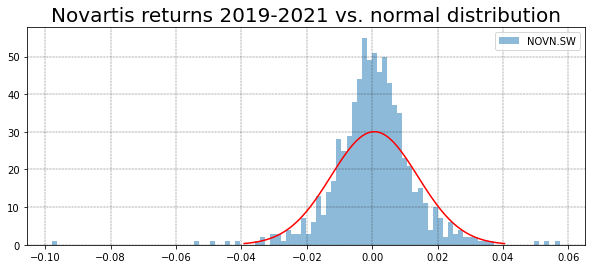

In [55]:
returns_19["NOVN.SW"].hist(bins = 100, label = "NOVN.SW", alpha = 0.5, figsize = (10,4))
x = np.linspace(mean_portfolio_19 - 3* std_portfolio_19, mean_portfolio_19 +3 *std_portfolio_19,100)
plt.plot(x, scipy.stats.norm.pdf(x, mean_portfolio_19, std_portfolio_19), "r")
plt.title("Novartis returns 2019-2021 vs. normal distribution", fontsize = (20))
plt.grid(which="major", color="k", linestyle="-.", linewidth=0.3)
plt.legend()

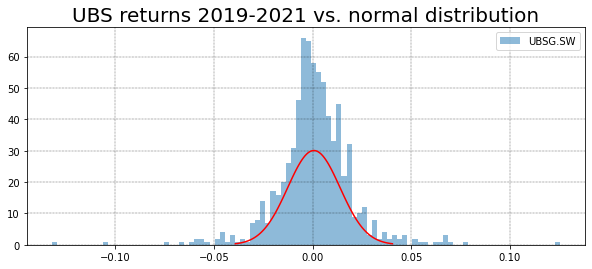

In [56]:
returns_19["UBSG.SW"].hist(bins = 100, label = "UBSG.SW", alpha = 0.5, figsize = (10,4))
x = np.linspace(mean_portfolio_19 - 3* std_portfolio_19, mean_portfolio_19 +3 *std_portfolio_19,100)
plt.plot(x, scipy.stats.norm.pdf(x, mean_portfolio_19, std_portfolio_19), "r")
plt.title("UBS returns 2019-2021 vs. normal distribution", fontsize = (20))
plt.grid(which="major", color="k", linestyle="-.", linewidth=0.3)
plt.legend()

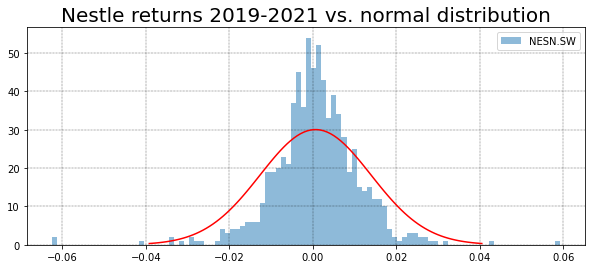

In [57]:
returns_19["NESN.SW"].hist(bins = 100, label = "NESN.SW", alpha = 0.5, figsize = (10,4))
x = np.linspace(mean_portfolio_19 - 3* std_portfolio_19, mean_portfolio_19 +3 *std_portfolio_19,100)
plt.plot(x, scipy.stats.norm.pdf(x, mean_portfolio_19, std_portfolio_19), "r")
plt.title("Nestle returns 2019-2021 vs. normal distribution", fontsize = (20))
plt.grid(which="major", color="k", linestyle="-.", linewidth=0.3)
plt.legend()


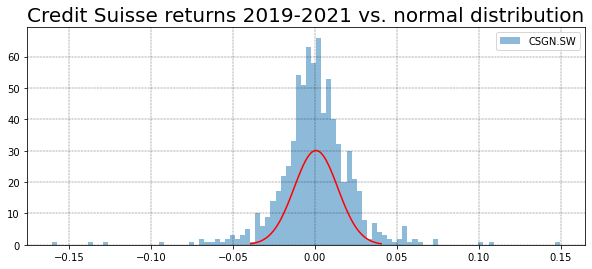

In [58]:
returns_19["CSGN.SW"].hist(bins = 100, label = "CSGN.SW", alpha = 0.5, figsize = (10,4))
x = np.linspace(mean_portfolio_19 - 3* std_portfolio_19, mean_portfolio_19 +3 *std_portfolio_19,100)
plt.plot(x, scipy.stats.norm.pdf(x, mean_portfolio_19, std_portfolio_19), "r")
plt.title("Credit Suisse returns 2019-2021 vs. normal distribution", fontsize = (20))
plt.grid(which="major", color="k", linestyle="-.", linewidth=0.3)
plt.legend()

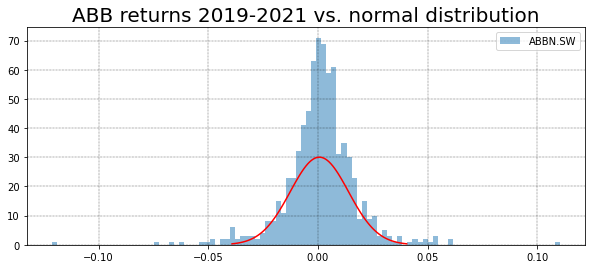

In [59]:
returns_19["ABBN.SW"].hist(bins = 100, label = "ABBN.SW", alpha = 0.5, figsize = (10,4))
x = np.linspace(mean_portfolio_19 - 3* std_portfolio_19, mean_portfolio_19 +3 *std_portfolio_19,100)
plt.plot(x, scipy.stats.norm.pdf(x, mean_portfolio_19, std_portfolio_19), "r")
plt.title("ABB returns 2019-2021 vs. normal distribution", fontsize = (20))
plt.grid(which="major", color="k", linestyle="-.", linewidth=0.3)
plt.legend()


The plots show that the retruns are approximately normally distributed


# Sharp Ratio Portfolio SMI 2008-2010 and 2019-2021

In [60]:
returns_08 = np.sum(np.multiply(mean_returns_08, weights_08)) * 504
std_08 = std_portfolio_08
risk_free_return_08 = int(0) # assumption
sharpe_ratio_08= (mean_portfolio_08 - risk_free_return_08) / std_08
print(sharpe_ratio_08)

-0.0031568352282086098


In [61]:
returns_19 = np.sum(np.multiply(mean_returns_08, weights_08)) * 504
std_19 = std_portfolio_19
risk_free_return_19 = 0 # Annahme
sharpe_ratio_19= (mean_portfolio_19 - risk_free_return_19) / std_19
print(sharpe_ratio_19)

0.048907119458802745


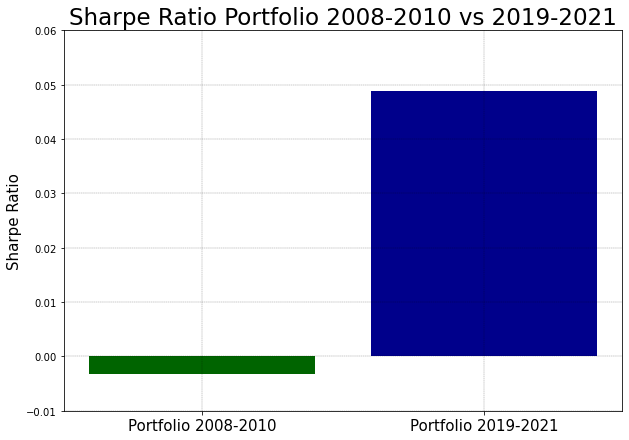

In [62]:
y = [sharpe_ratio_08, sharpe_ratio_19]
x =[0.5, 1.5]
plt.figure(figsize=(10,7))
labels = "Portfolio 2008-2010", "Portfolio 2019-2021"
plt.ylim(-0.01,0.06)
plt.ylabel("Sharpe Ratio", fontsize = (15))
plt.title("Sharpe Ratio Portfolio 2008-2010 vs 2019-2021", fontsize = (23))
plt.bar(x, y, tick_label=labels, color=["darkgreen", "darkblue"])
plt.grid(which="major", color="k", linestyle="-.", linewidth=0.2)
plt.xticks(x, fontsize = (15))
plt.show()


# Findings<br>
...

# Conclussion

# Reflection

#The last section of the report should be a reflection on your work. 
#Which problems did you encounter and how did you solve them? What was easy, what was hard? 
How would you rate the end result?


# Refernces
All data used was downloaded from Yahoo Finance